In [1]:
# !pip install umap-learn
# !pip install -U scikit-learn

In [2]:
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = datasets.load_iris()
data = iris["data"]
labels = iris["target"]

In [4]:
tsne_data = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(data)
umap_data = umap.UMAP(n_neighbors=25, n_components=2).fit_transform(data)

Accuracies: {'T-Sne': 0.9666666666666667, 'Umap': 0.9733333333333334}


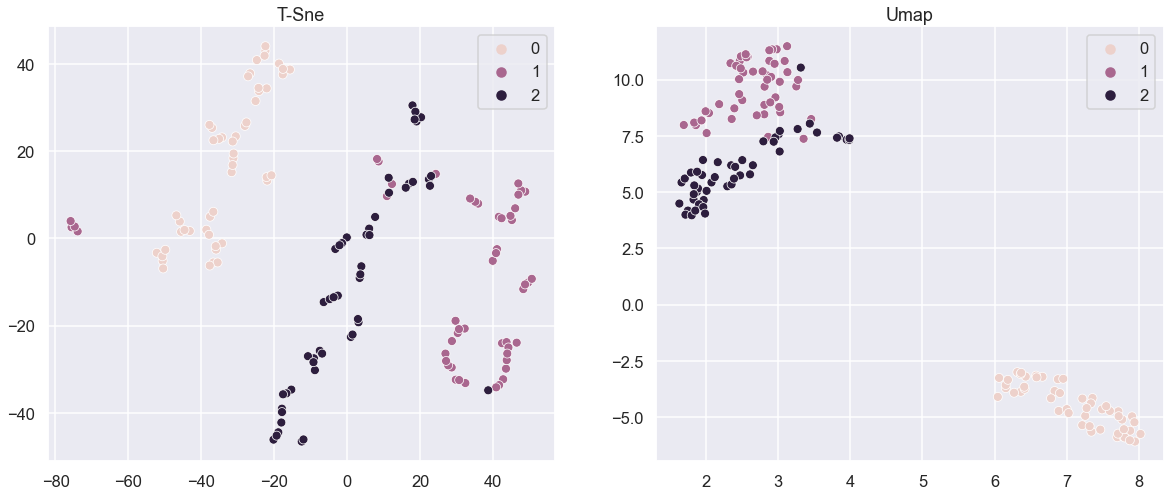

In [5]:
accuracies = {"T-Sne":0, "Umap":0}
num_neightbors = 5
datasets = {"T-Sne":tsne_data, "Umap":umap_data}

fig, axs = plt.subplots(1,2, figsize=(20,8))
sns.set(style="darkgrid", context="talk")

for index, data_name in enumerate(datasets.keys()):
    
    plt.subplot(1,2, index+1)
    graph = sns.scatterplot(x=datasets[data_name][:, 0], y=datasets[data_name][:, 1], hue=labels)
    graph.set_title(data_name)
    
    knn = KNeighborsClassifier(n_neighbors=num_neightbors)
    knn.fit(datasets[data_name], labels)
    predicted = knn.predict(datasets[data_name])
    accuracies[data_name] = accuracy_score(predicted, labels)
    
print(f"Accuracies: {accuracies}")

#### Testing with the new hyperparameters  

In [6]:
tsne_data1 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, n_iter=10000, n_iter_without_progress=500,).fit_transform(data)
umap_data1 = umap.UMAP(n_neighbors=4, n_components=2).fit_transform(data)

Accuracies1: {'T-Sne': 0.9666666666666667, 'Umap': 0.9733333333333334}


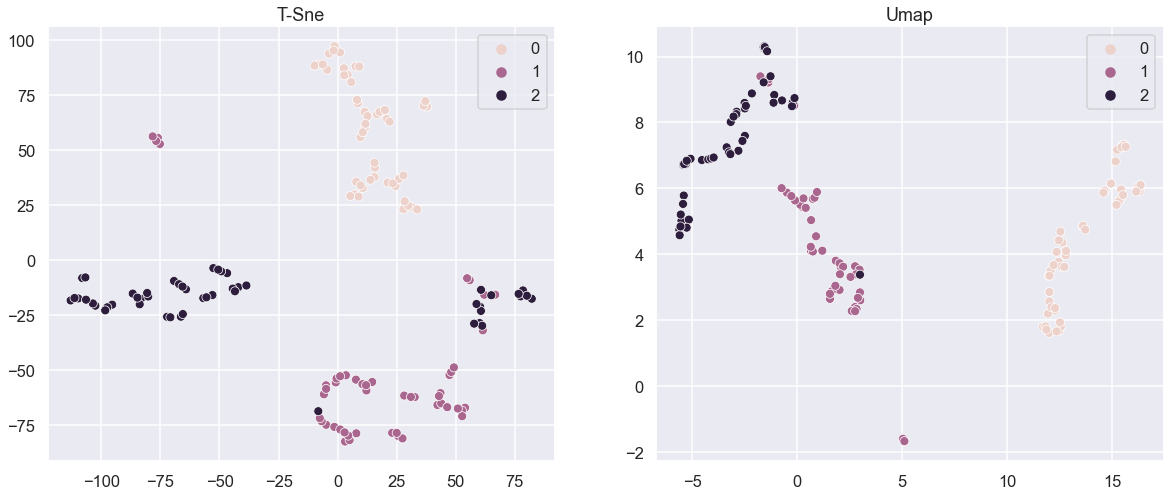

In [7]:
accuracies1 = {"T-Sne":0, "Umap":0}
num_neightbors = 5
datasets1 = {"T-Sne":tsne_data1, "Umap":umap_data1}

fig, axs = plt.subplots(1,2, figsize=(20,8))
sns.set(style="darkgrid", context="talk")

for index, data_name in enumerate(datasets1.keys()):
    
    plt.subplot(1,2, index+1)
    graph = sns.scatterplot(x=datasets1[data_name][:, 0], y=datasets1[data_name][:, 1], hue=labels)
    graph.set_title(data_name)
    
    knn = KNeighborsClassifier(n_neighbors=num_neightbors)
    knn.fit(datasets1[data_name], labels)
    predicted = knn.predict(datasets1[data_name])
    accuracies1[data_name] = accuracy_score(predicted, labels)
    
print(f"Accuracies1: {accuracies1}");

### Distance Calculations

In [8]:
first_data = pd.DataFrame({
    "y": tsne_data[:, 0],
    "x": umap_data[:, 1],
    "labels": labels,
})

second_data = pd.DataFrame({
    "y": tsne_data1[:, 0],
    "x": umap_data1[:, 1],
    "labels": labels,
})

In [9]:
def solution_distance(data):
    res = []
    for label in data["labels"].unique():
        filter_data = data[data['labels'] == label].iloc[:, :2].values
        distance = euclidean_method(filter_data)
        res.append(distance)
    return res

In [10]:
def euclidean_method(ndarr):
    distance = 0
    counter = 0
    for first_element in ndarr:
        for other_element in ndarr:
            distance += np.sqrt(pow(first_element[0] - other_element[0], 2) + pow(first_element[1] - other_element[1], 2))
            counter += 1
    return distance / counter

In [11]:
solution_distance(first_data)

[11.22850689743141, 26.59979349074048, 16.062654963081076]

In [12]:
solution_distance(second_data)

[14.076308492068009, 37.54518496374836, 70.89204682509161]

### Creat data

In [13]:
first_data.to_csv("first_data.csv", index=False)
second_data.to_csv("second_data.csv", index=False)